# Data Preprocessing

In this notebook, we apply preprocessing steps to prepare the MNIST
dataset for training a convolutional neural network.

## Why Preprocessing?

Preprocessing ensures that the input data is in a suitable format for
the neural network. Proper normalization and reshaping help the model
converge faster and achieve better performance.

In [2]:
# Import Libraries

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# Define Transformations

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

## Normalization

The MNIST images are normalized using the dataset's mean and standard
deviation. This helps stabilize the training process and speeds up
convergence.

In [7]:
# Load Dataset with Preprocessing

train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=False,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="../data",
    train=False,
    download=False,
    transform=transform
)

In [8]:
# Verify Preprocessed Data

image, label = train_dataset[0]

print("Image shape:", image.shape)
print("Min pixel value:", image.min().item())
print("Max pixel value:", image.max().item())

Image shape: torch.Size([1, 28, 28])
Min pixel value: -0.4242129623889923
Max pixel value: 2.821486711502075


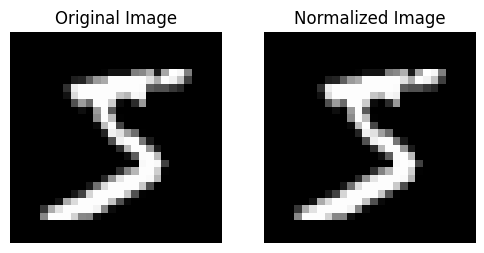

In [11]:
# Visual Comparison

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

original = datasets.MNIST(
    root="../data",
    train=True,
    download=False,
    transform=transforms.ToTensor()
)[0][0]

processed = image

axes[0].imshow(original.squeeze(), cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(processed.squeeze(), cmap="gray")
axes[1].set_title("Normalized Image")
axes[1].axis("off")

plt.savefig("../images/preprocessing_comparison.png", bbox_inches="tight")
plt.show()

## Key Takeaways

- Images are converted to tensors with shape (1, 28, 28).
- Normalization improves training stability.
- The same preprocessing pipeline must be applied during inference.